In [4]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing import sequence

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

17464789/17464789 [==============================] - 0s 0us/step
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 li

In [5]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)
print("Eğitim kümesinin son hali : \n", X_train)

Eğitim kümesinin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [6]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = 'sigmoid'))

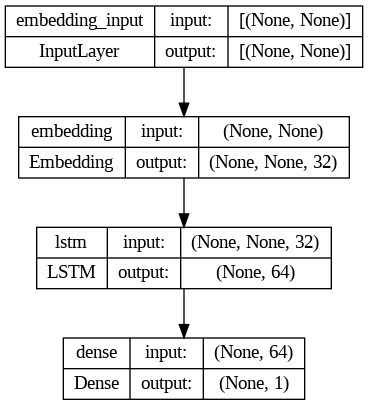

In [7]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "VBU-Group3-LSTM.png", show_shapes = True, show_layer_names = True)

In [8]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [9]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Epoch 1/10
40/40 [==============================] - 16s 208ms/step - loss: 0.6950 - accuracy: 0.5504 - val_loss: 0.6711 - val_accuracy: 0.5376
Epoch 2/10
40/40 [==============================] - 5s 134ms/step - loss: 0.6621 - accuracy: 0.5957 - val_loss: 0.6522 - val_accuracy: 0.6798
Epoch 3/10
40/40 [==============================] - 5s 115ms/step - loss: 0.6258 - accuracy: 0.7506 - val_loss: 0.5964 - val_accuracy: 0.7564
Epoch 4/10
40/40 [==============================] - 3s 72ms/step - loss: 0.4609 - accuracy: 0.8162 - val_loss: 0.3768 - val_accuracy: 0.8462
Epoch 5/10
40/40 [==============================] - 4s 96ms/step - loss: 0.2993 - accuracy: 0.8801 - val_loss: 0.3078 - val_accuracy: 0.8736
Epoch 6/10
40/40 [==============================] - 3s 63ms/step - loss: 0.2317 - accuracy: 0.9121 - val_loss: 0.2886 - val_accuracy: 0.8796
Epoch 7/10
40/40 [==============================] - 2s 56ms/step - loss: 0.2051 - accuracy: 0.9258 - val_loss: 0.3167 - val_accuracy: 0.8818
Epoch 8/1

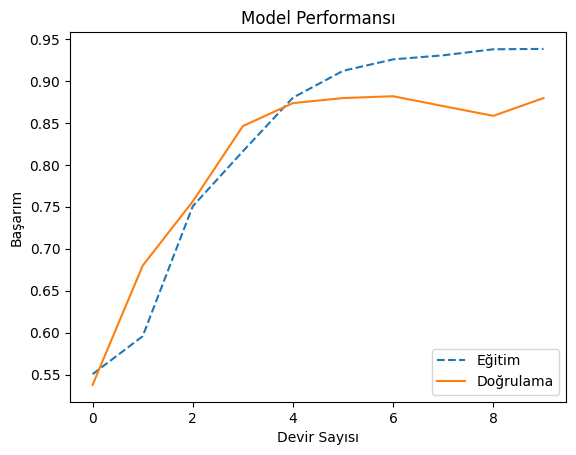

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Başarım")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

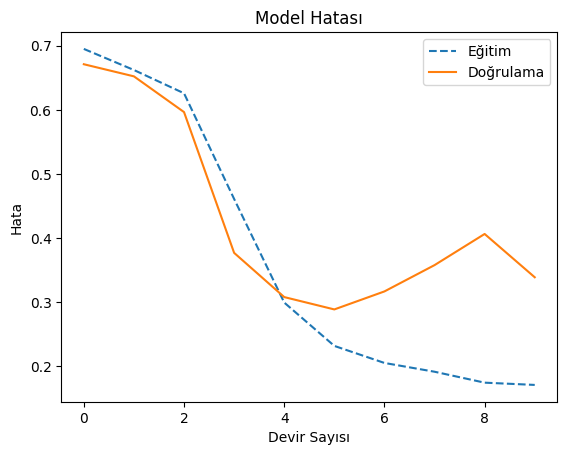

In [13]:
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [14]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Başarımı : %.2f%%" % (performans[1]*100))

Modelin Başarımı : 87.10%


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

In [17]:
data = pd.read_csv('/content/haberman_yeni.csv')
data.head()

,Age_of_patient,year_of_operation,positive_axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [18]:
print(data.shape)

(299, 4)


In [20]:
X = data.drop('Survival_status', axis = 1)
y = data['Survival_status']

In [21]:
from sklearn.preprocessing import MinMaxScaler
op = MinMaxScaler(feature_range = (0,1))
X = op.fit_transform(X)

In [22]:
print(X.shape[1])

3


In [23]:
oznitelik_sayisi = X.shape[1]
girislerin_boyutu = Input(shape = (oznitelik_sayisi, ))

#Kodlanacak değişkenlerin sayısı (darboğaz nöron sayısı)
darbogaz_boyutu = 2

#Encoder katmanını tanımla
kodlayıcı = Dense(3, activation = 'relu')(girislerin_boyutu)
kodlayıcı = Dense(3, activation = 'relu')(girislerin_boyutu)

#Darboğaz katmanı
kodlayıcı = Dense(darbogaz_boyutu, activation = 'relu')(kodlayıcı)

#Decoder (kod çözücü) katmanı
kod_cozucu = Dense(3, activation = 'sigmoid')(kodlayıcı)
kod_cozucu = Dense(3, activation = 'sigmoid')(kodlayıcı)

In [24]:
otokodlayici = Model(inputs = girislerin_boyutu, outputs = kod_cozucu)

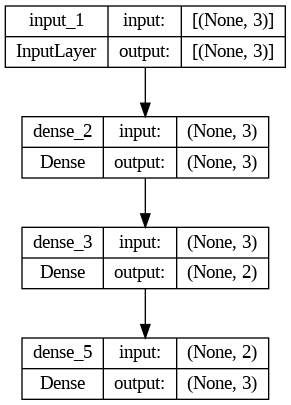

In [25]:
import tensorflow as tf
tf.keras.utils.plot_model(otokodlayici, "haberman2710.png", show_shapes = True, show_layer_names = True)

In [26]:
otokodlayici.compile(loss = 'mse', optimizer = 'adam')

In [27]:
history = otokodlayici.fit(
    X,
    X,
    epochs = 100,
    batch_size = 16,
    verbose = 2,
    validation_split = 0.2
)

Epoch 1/100
15/15 - 3s - loss: 0.1162 - val_loss: 0.1729 - 3s/epoch - 225ms/step
Epoch 2/100
15/15 - 0s - loss: 0.1120 - val_loss: 0.1643 - 65ms/epoch - 4ms/step
Epoch 3/100
15/15 - 0s - loss: 0.1085 - val_loss: 0.1575 - 78ms/epoch - 5ms/step
Epoch 4/100
15/15 - 0s - loss: 0.1056 - val_loss: 0.1521 - 64ms/epoch - 4ms/step
Epoch 5/100
15/15 - 0s - loss: 0.1032 - val_loss: 0.1479 - 68ms/epoch - 5ms/step
Epoch 6/100
15/15 - 0s - loss: 0.1012 - val_loss: 0.1447 - 72ms/epoch - 5ms/step
Epoch 7/100
15/15 - 0s - loss: 0.0994 - val_loss: 0.1422 - 80ms/epoch - 5ms/step
Epoch 8/100
15/15 - 0s - loss: 0.0978 - val_loss: 0.1402 - 67ms/epoch - 4ms/step
Epoch 9/100
15/15 - 0s - loss: 0.0964 - val_loss: 0.1383 - 78ms/epoch - 5ms/step
Epoch 10/100
15/15 - 0s - loss: 0.0951 - val_loss: 0.1368 - 82ms/epoch - 5ms/step
Epoch 11/100
15/15 - 0s - loss: 0.0939 - val_loss: 0.1357 - 68ms/epoch - 5ms/step
Epoch 12/100
15/15 - 0s - loss: 0.0928 - val_loss: 0.1349 - 69ms/epoch - 5ms/step
Epoch 13/100
15/15 - 0s -

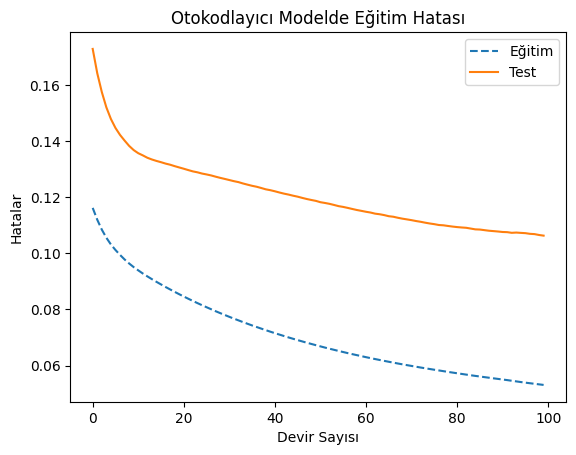

In [28]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Otokodlayıcı Modelde Eğitim Hatası")
plt.xlabel("Devir Sayısı")
plt.ylabel("Hatalar")
plt.legend(["Eğitim", "Test"], loc = "upper right")
plt.show()

In [29]:
#Yeniden Yapılandırma Hatası (Reconstruction Error)

10/10 [==============================] - 0s 2ms/step


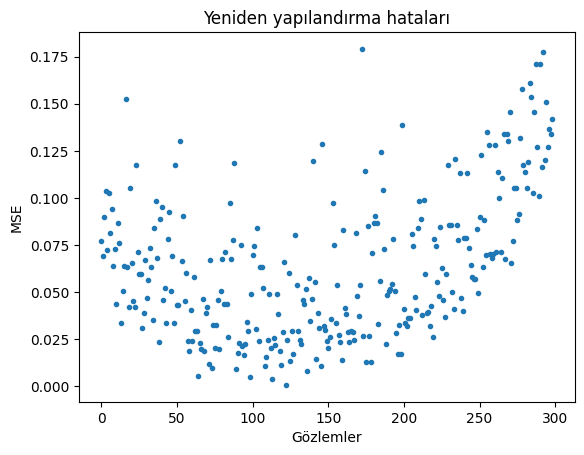

In [30]:
ongoruler = otokodlayici.predict(X)
mse = np.mean(np.power(X - ongoruler, 2), axis = 1)

#Reconstruction Grafiği
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = '.')
plt.title("Yeniden yapılandırma hataları")
plt.xlabel("Gözlemler")
plt.ylabel("MSE")
plt.show()

In [31]:
print('\n Eşik değeri giriniz: \n')
eşik = float(input())


 Eşik değeri giriniz: 

0.17


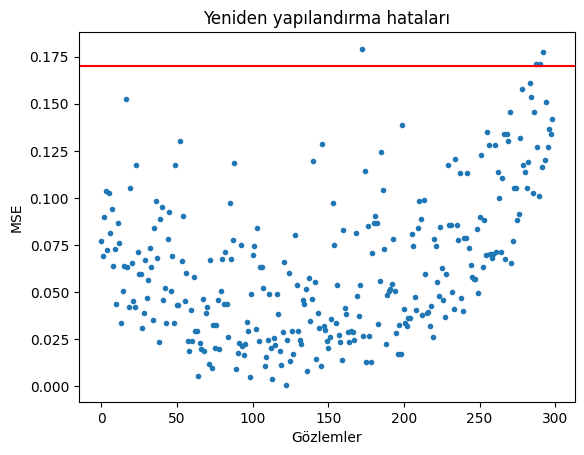

In [32]:
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = '.')
plt.title("Yeniden yapılandırma hataları")
plt.xlabel("Gözlemler")
plt.ylabel("MSE")
plt.axhline(y = eşik, color = 'r')
plt.show()

In [33]:
anormal = pd.DataFrame(data[mse > eşik])
print("Anormal değerlerin sayısı : ", anormal.shape)

Anormal değerlerin sayısı :  (4, 4)


In [34]:
print("Anormal Değerler :", anormal)

Anormal Değerler :      Age_of_patient  year_of_operation  positive_axillary_nodes  \
172              54                 67                       46   
287              70                 68                        0   
290              71                 68                        2   
292              72                 58                        0   

     Survival_status  
172                1  
287                1  
290                1  
292                1  


In [35]:
anormal_yok = pd.DataFrame(data[mse <= eşik])
print("Önceki veri :", X.shape)
print("Şimdiki veri :", anormal_yok.shape)

Önceki veri : (299, 3)
Şimdiki veri : (295, 4)


In [37]:
çıkış = pd.DataFrame(anormal_yok)
çıkış.to_csv("haberman_2710tarihli_anomali_olmayanlar_hesabı.csv", index = False)